In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

To verify that dataset looks correct let's plot the first 10 images from the training set

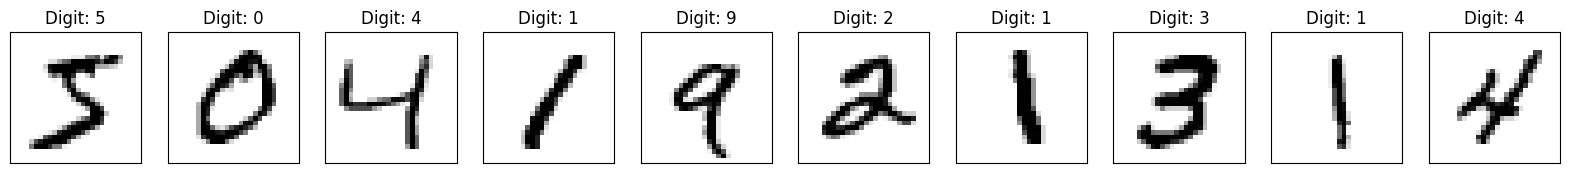

In [4]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title('Digit: '+str(y_train[i]))
plt.show()


#reshape dataset to have a single channel

In [5]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

#Build the Model

In [6]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1274 - accuracy: 0.9615 - val_loss: 0.0475 - val_accuracy: 0.9848
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0405 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0317 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0296 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0339 -

In [10]:
model.save('my_model.h5')
print('saved model to disk')

saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# prompt: load the model

from tensorflow.keras.models import load_model
model = load_model('my_model.h5')
print('model loaded from disk')


model loaded from disk


In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load and prepare the image
def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28, 1))
    # Convert to array
    img = img_to_array(img)
    # Reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Prepare pixel data
    img = img.astype('float32')
    img = img / 255
    return img

# Load an image and predict the class
def predict_sample():
    # Load the image
    img = load_image('sample2.png')
    # Load model
    model = load_model('my_model.h5')
    # Predict the class probabilities
    probabilities = model.predict(img)
    # Find the class with the highest probability
    predicted_class = probabilities.argmax()
    print(predicted_class)

predict_sample()


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
2


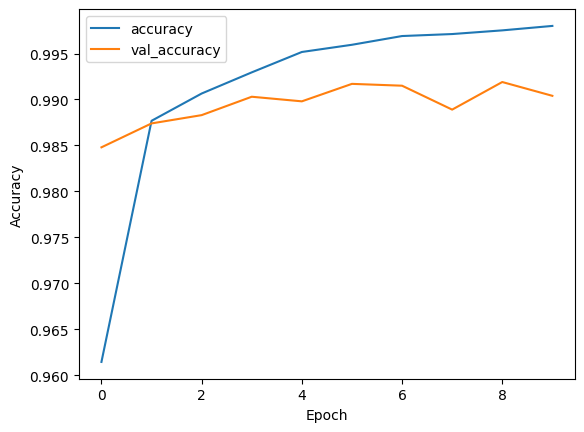

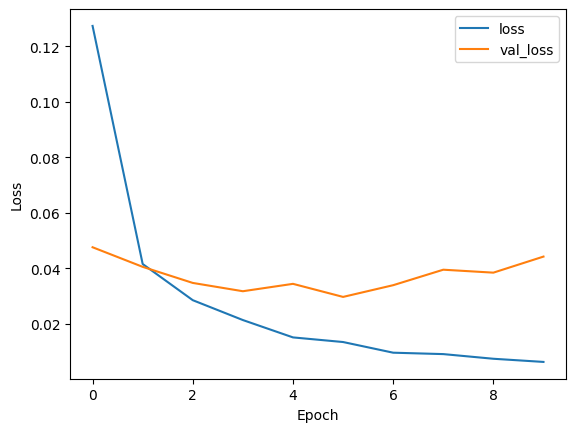

In [13]:
# prompt: evaluate the mode grap

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
